# 贷款用户逾期情况预测

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

import missingno as msno

from sklearn.model_selection import train_test_split  #数据集切分

import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
data = pd.read_csv("H:/data-analysis-item/Data_Mining_Practice-8/data.csv")
#H:/data-analysis-item/Data_Mining_Practice-8/data.csv    E:/mypython/Data-Mining-Pratice-8/data.csv
data.shape

(4754, 90)

In [3]:
data.head(10)

,Unnamed: 0,custid,trade_no,bank_card_no,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
0,5,2791858,20180507115231274000000023057383,卡号1,0.01,0.99,0,0.90,0.55,0.313,...,2900.0,1688.0,1200.0,75.0,1.0,2.0,1200.0,1200.0,12.0,18.0
1,10,534047,20180507121002192000000023073000,卡号1,0.02,0.94,2000,1.28,1.00,0.458,...,3500.0,1758.0,15100.0,80.0,5.0,6.0,22800.0,9360.0,4.0,2.0
2,12,2849787,20180507125159718000000023114911,卡号1,0.04,0.96,0,1.00,1.00,0.114,...,1600.0,1250.0,4200.0,87.0,1.0,1.0,4200.0,4200.0,2.0,6.0
3,13,1809708,20180507121358683000000388283484,卡号1,0.00,0.96,2000,0.13,0.57,0.777,...,3200.0,1541.0,16300.0,80.0,5.0,5.0,30000.0,12180.0,2.0,4.0
4,14,2499829,20180507115448545000000388205844,卡号1,0.01,0.99,0,0.46,1.00,0.175,...,2300.0,1630.0,8300.0,79.0,2.0,2.0,8400.0,8250.0,22.0,120.0
5,15,518072,20180507121233054000000388275132,卡号1,0.02,0.98,2000,7.59,1.00,0.733,...,5300.0,1941.0,11200.0,80.0,10.0,12.0,20400.0,8130.0,3.0,4.0
6,16,1205125,20180507121931540000000388298915,卡号1,0.02,0.98,0,23.67,0.94,0.087,...,2200.0,2200.0,7600.0,73.0,2.0,2.0,16800.0,8900.0,1.0,3.0
7,18,1129897,20180507124659235000000023105807,卡号1,0.02,0.98,0,0.25,0.88,0.302,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,20,2599411,20180507115855621000000388224458,卡号1,0.03,0.65,0,0.31,0.76,0.472,...,5300.0,4750.0,5500.0,79.0,8.0,11.0,19200.0,7987.0,24.0,7.0
9,26,1413051,20180504155156296000000021138084,卡号1,0.01,0.99,500,0.80,1.00,0.088,...,2800.0,1520.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,142.0


In [4]:
data = data.drop(['Unnamed: 0','custid'], axis=1)  #删除无意义的index

## Task1 数据探索与分析

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4754 entries, 0 to 4753
Data columns (total 88 columns):
trade_no                                      4754 non-null object
bank_card_no                                  4754 non-null object
low_volume_percent                            4752 non-null float64
middle_volume_percent                         4752 non-null float64
take_amount_in_later_12_month_highest         4754 non-null int64
trans_amount_increase_rate_lately             4751 non-null float64
trans_activity_month                          4752 non-null float64
trans_activity_day                            4752 non-null float64
transd_mcc                                    4752 non-null float64
trans_days_interval_filter                    4746 non-null float64
trans_days_interval                           4752 non-null float64
regional_mobility                             4752 non-null float64
student_feature                               1756 non-null float64
repayment_cap

**目标变量的分布**

In [6]:
data.status.value_counts()

0    3561
1    1193
Name: status, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E7965EC5F8>],
      dtype=object)

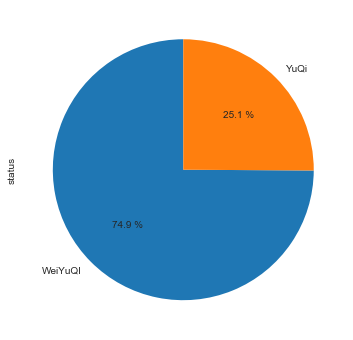

In [7]:
status_pie = pd.value_counts(data['status'])
status_pie.index = ["WeiYuQI", "YuQi"]
labes = status_pie.index
status_pie.plot(kind='pie',
                subplots=True,
                figsize=(6, 6),
                autopct='%3.1f %%',
                startangle=90)

**筛选出object属性的变量**

In [8]:
objectcol = data.select_dtypes(include='object')
objectcol.iloc[1]

trade_no                   20180507121002192000000023073000
bank_card_no                                            卡号1
reg_preference_for_trad                                一线城市
source                                                   xs
id_name                                                 崔向朝
latest_query_time                                2018-05-03
loans_latest_time                                2018-05-05
Name: 1, dtype: object

In [9]:
print(objectcol.bank_card_no.value_counts())  #对建模无意义，可删除
print(objectcol.reg_preference_for_trad.value_counts())
print(objectcol.source.value_counts())  #对建模无意义 ，可删除

卡号1    4754
Name: bank_card_no, dtype: int64
一线城市    3403
三线城市    1064
境外       150
二线城市     131
其他城市       4
Name: reg_preference_for_trad, dtype: int64
xs    4754
Name: source, dtype: int64


In [10]:
#无关变量的筛选
data.drop(['trade_no', 'bank_card_no', 'source', 'id_name'],
          axis=1,
          inplace=True)
data.drop(['first_transaction_time', 'latest_query_time', 'loans_latest_time'],
          axis=1,
          inplace=True)
#latest_query_time最新查询时间   loans_latest_time最新贷款时间 'latest_query_time','loans_latest_time','first_transaction_time' 暂且删除

数据类型转发：对object类型中的reg_preference_for_trad的数据替换

In [11]:
mapping_dict = {
    "reg_preference_for_trad":{
        "一线城市":1,
        "二线城市":2,
        "三线城市":3,
        "境外":4,
        "其他城市":5      
    }
}

data = data.replace(mapping_dict)#变量映射
data['reg_preference_for_trad'].head()  #查看效果

0    1.0
1    1.0
2    1.0
3    3.0
4    1.0
Name: reg_preference_for_trad, dtype: float64

**缺失值处理**

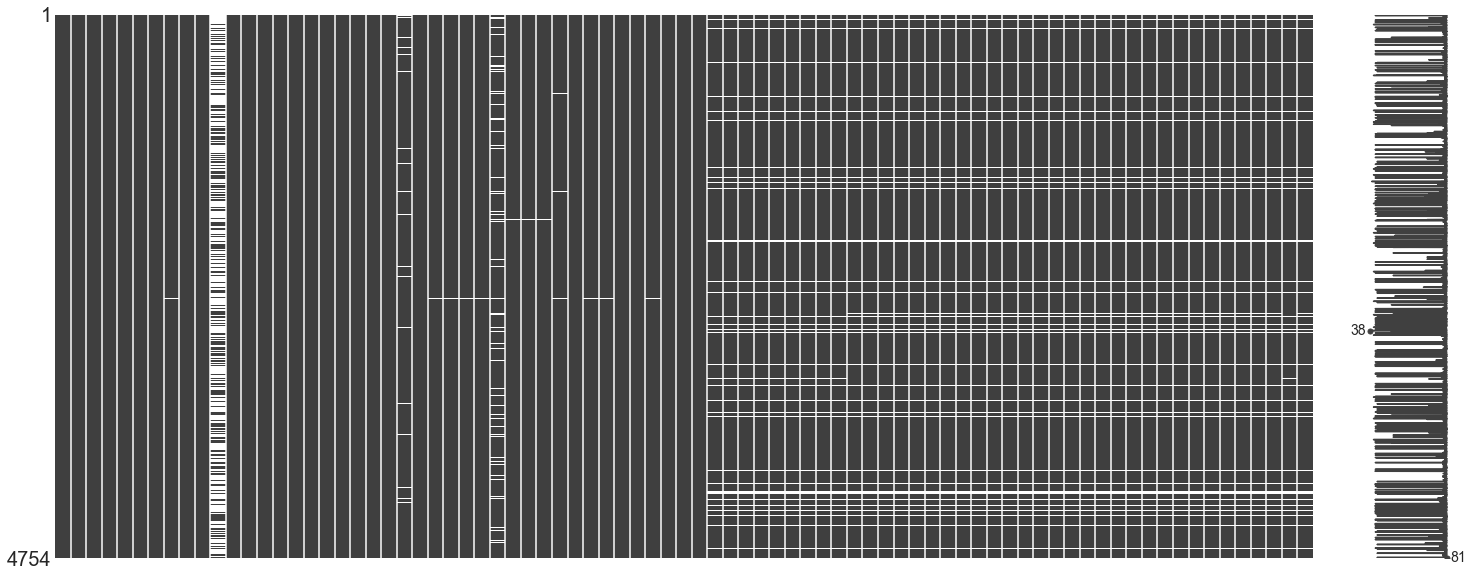

In [12]:
#数据整体情况
msno.matrix(data)

In [13]:
#计算各特征的缺失个数
data.isnull().sum().sort_values(ascending=False).head(15)

student_feature                     2998
cross_consume_count_last_1_month     426
latest_one_month_apply               304
query_finance_count                  304
latest_six_month_apply               304
latest_three_month_apply             304
query_cash_count                     304
query_sum_count                      304
query_org_count                      304
apply_credibility                    304
apply_score                          304
latest_query_day                     304
latest_one_month_loan                297
loans_score                          297
loans_credibility_behavior           297
dtype: int64

In [14]:
#用0填充student_feature的缺失值，假设缺失值不为学生
data['student_feature'][data['student_feature'].isnull()] = 0
data.student_feature.head(5)

0    0.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: student_feature, dtype: float64

In [15]:
#多数的特征缺失值个数为297个，找出index
na_index = data['latest_one_month_loan'][data['latest_one_month_loan'].isnull()].index

In [16]:
#删除这部分数据的观测
data = data.drop(index=na_index, axis=0)

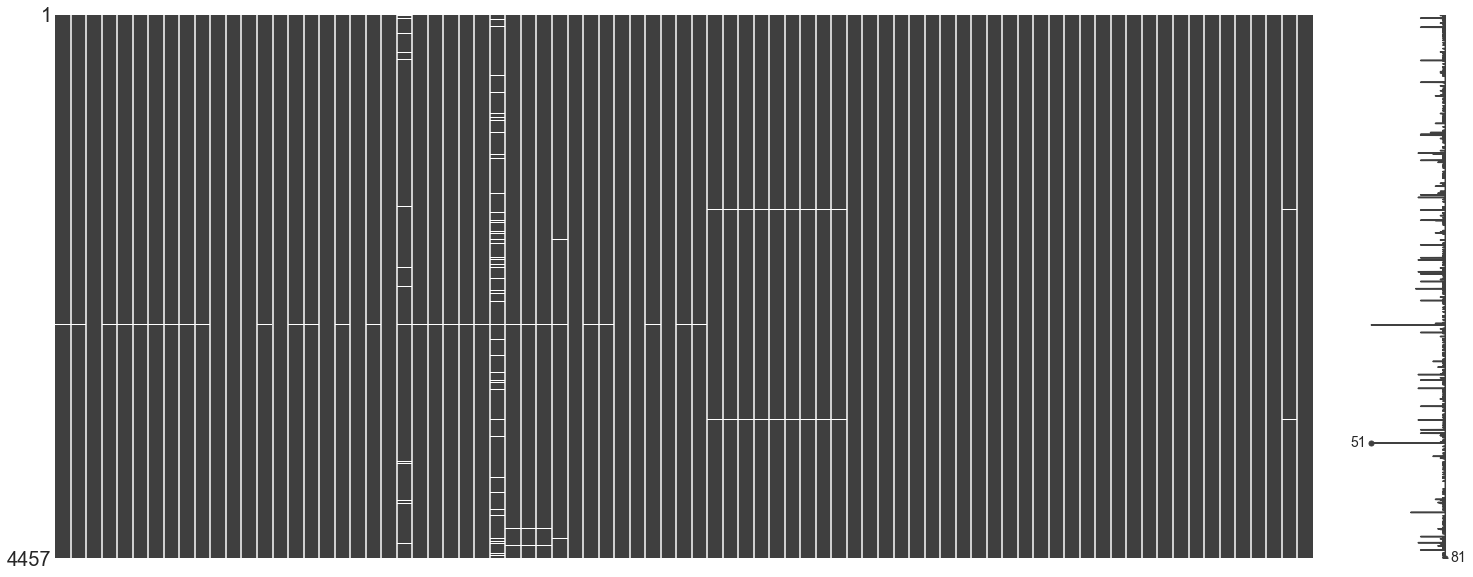

In [17]:
msno.matrix(data)

In [18]:
#筛选出还有缺失值的变量，用均值填充
na_col = data.isnull().sum().sort_values(
    ascending=False)[data.isnull().sum().sort_values(
        ascending=False) > 0].index

for i in na_col:
    data[i] = data[i].fillna(data[i].median())

**根据特征中的同值比例筛选**

In [19]:
equi_fea = []
for i in data.columns:
    try:
        mode_value = data[i].mode()[0]
        mode_rate = (data[i].value_counts()[0]) / data.shape[0]
        if mode_rate > 0.9:
            equi_fea.append([i, mode_value, mode_rate])
    except:
        pass
#众数占整体的比例，筛选出大于90%的变量

In [20]:
e = pd.DataFrame(equi_fea, columns=['col_name', 'mode_value', 'mode_rate'])
e.sort_values(by='mode_rate')

,col_name,mode_value,mode_rate
1,railway_consume_count_last_12_month,0.0,0.980256
0,is_high_user,0.0,0.988782
2,jewelry_consume_count_last_6_month,0.0,0.991250


In [21]:
#该部分变量对建模无意义，删除
data = data.drop(e.col_name,axis=1)
data.shape

(4457, 78)

**切分数据集**

In [22]:
train_data, test_data = train_test_split(data,
                                         test_size=0.3,
                                         random_state=2018)
train_data.to_csv('./train.csv', index=False, header=True)
test_data.to_csv('./test.csv', index=False, header=True)

## Task2 特征工程
### 特征清洗

**异常值处理**——怎么辨别？处理方法?

In [23]:
#提取出数值变量
data_num = data.select_dtypes('number').copy()
print(data_num.shape)

(4457, 78)


绘制小提琴图查看数据分布情况

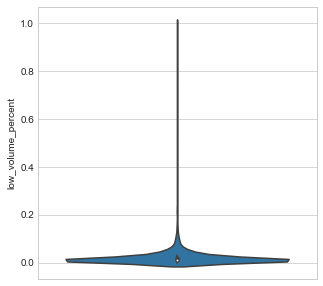

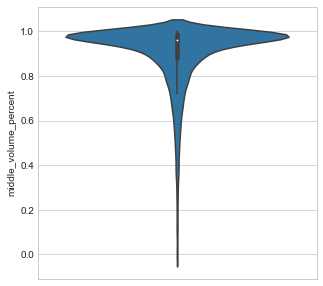

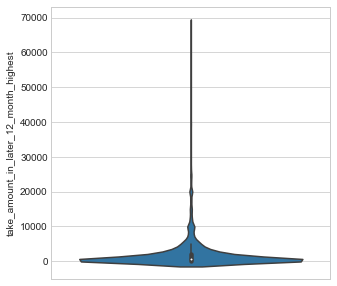

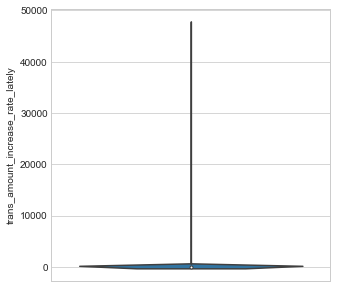

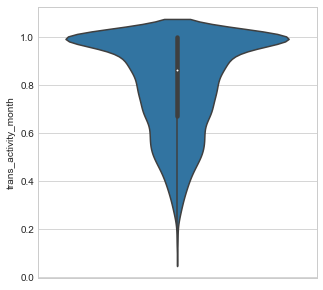

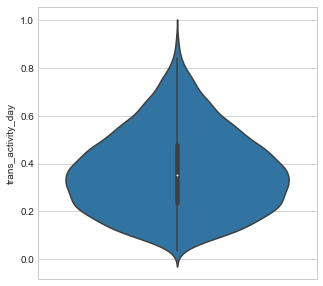

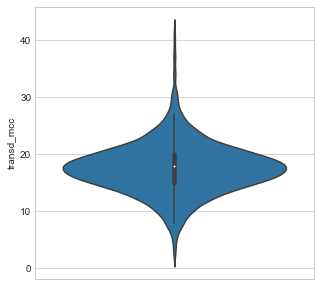

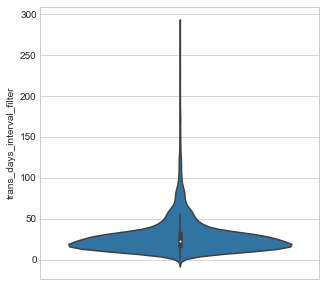

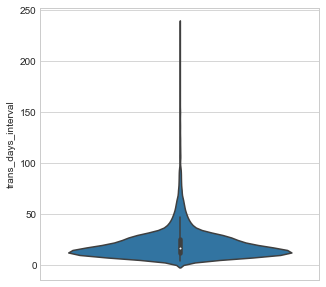

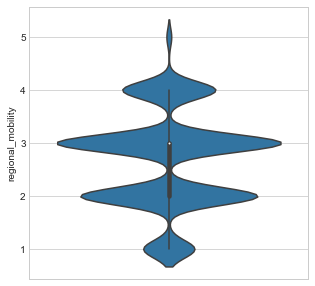

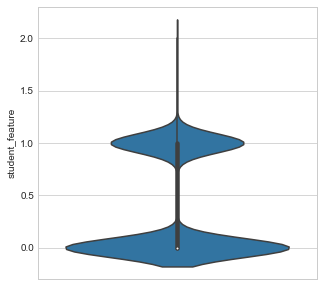

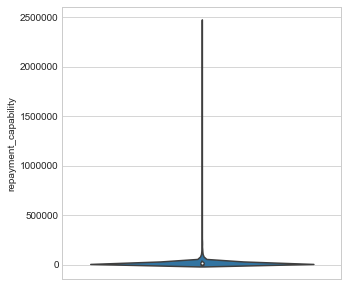

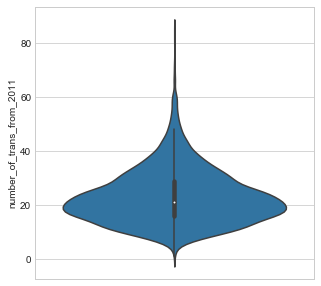

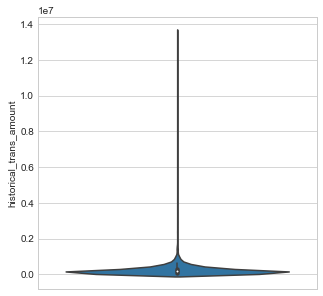

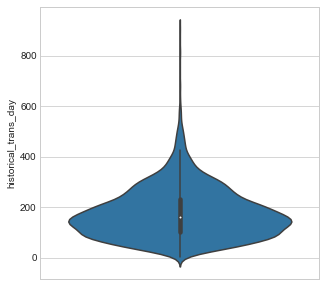

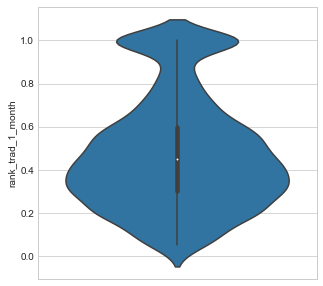

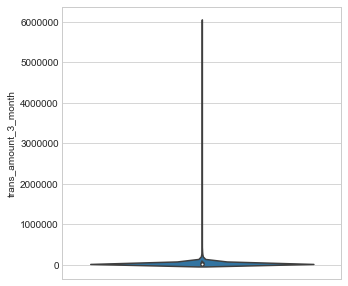

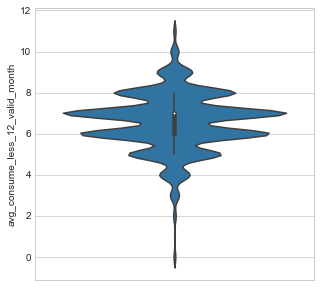

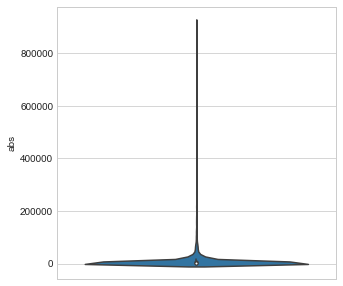

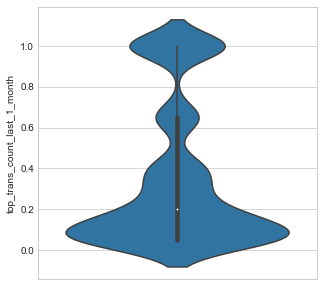

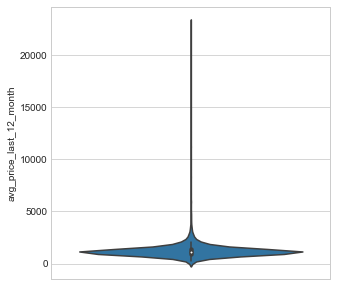

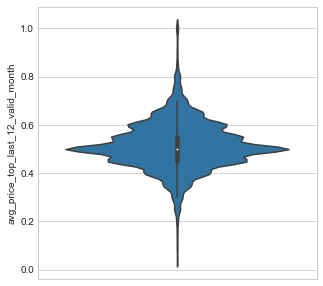

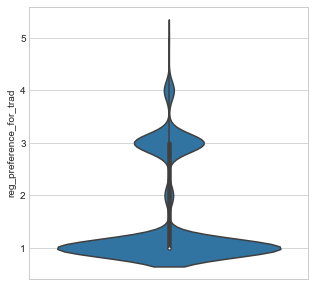

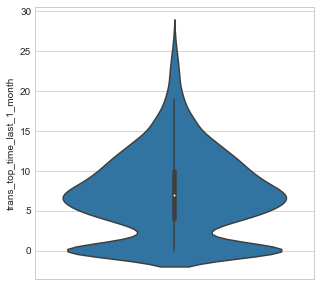

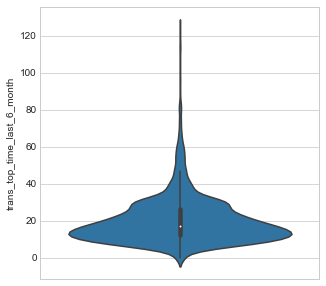

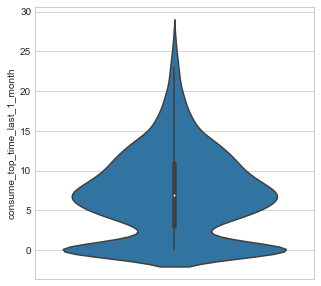

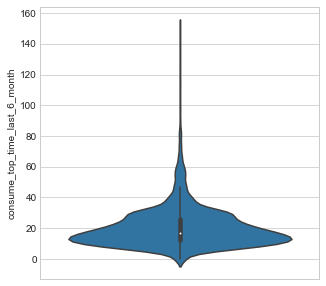

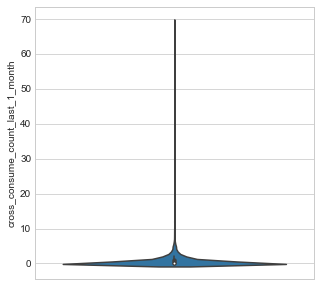

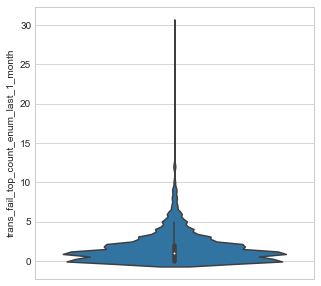

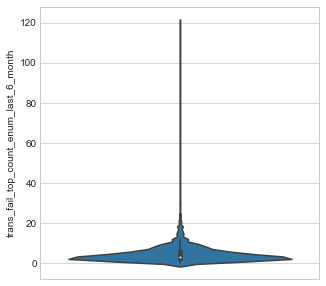

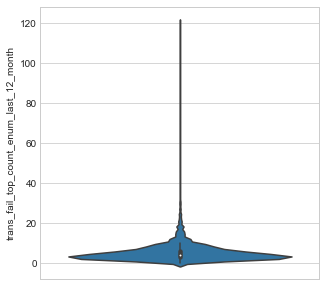

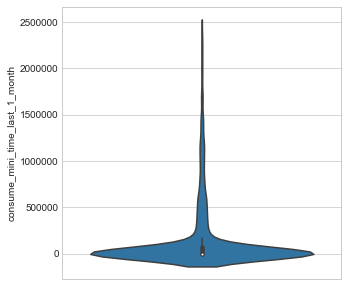

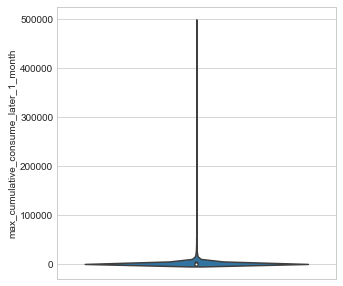

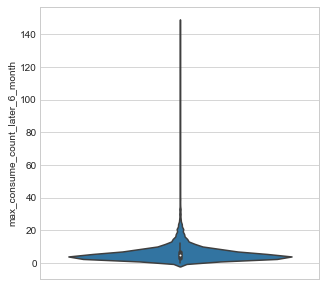

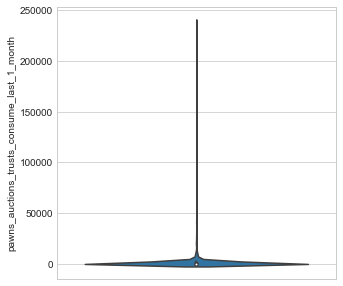

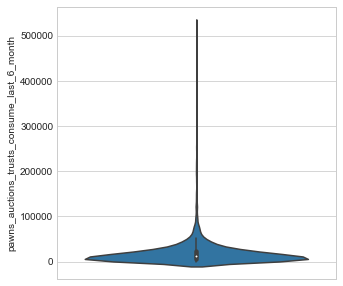

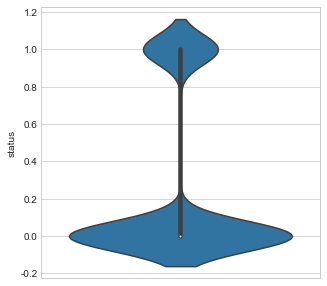

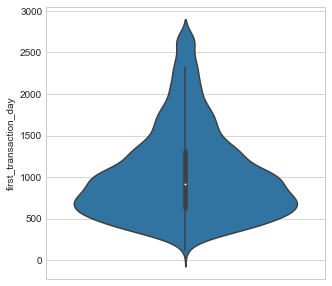

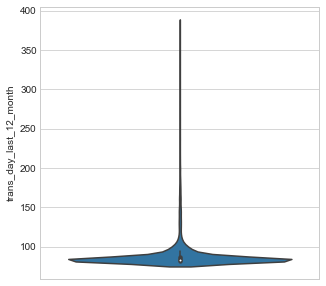

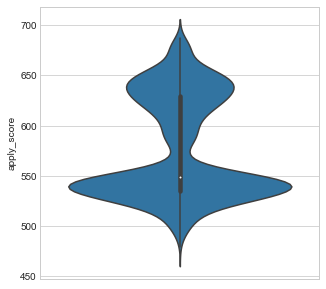

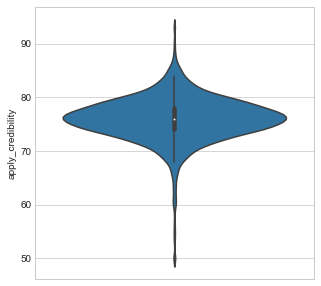

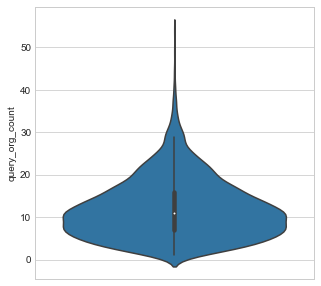

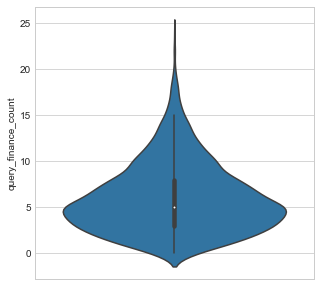

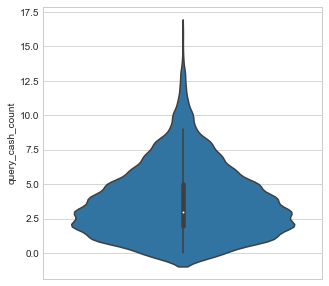

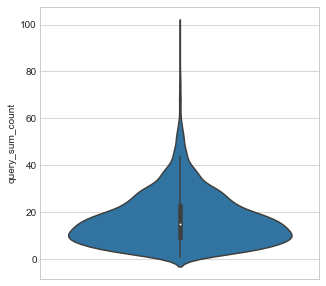

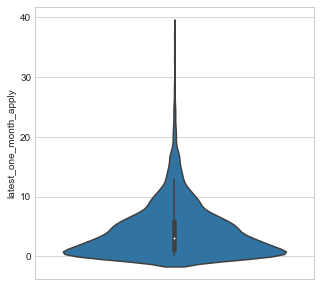

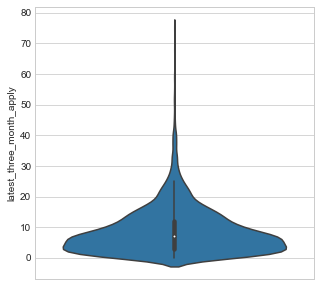

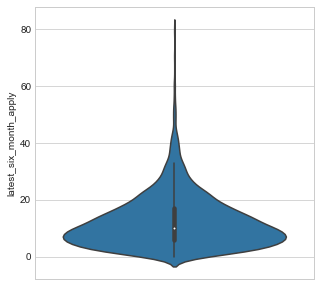

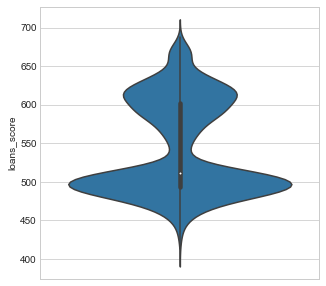

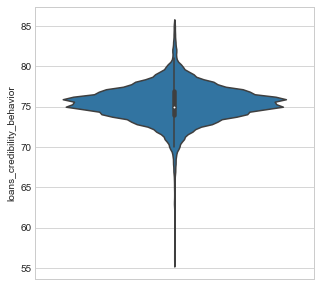

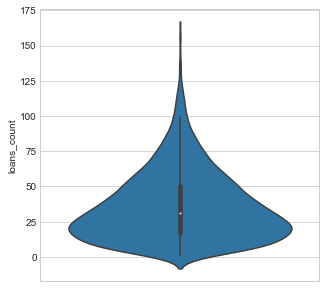

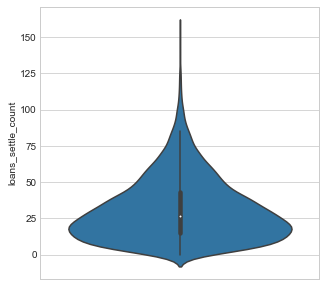

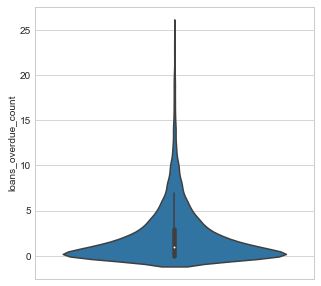

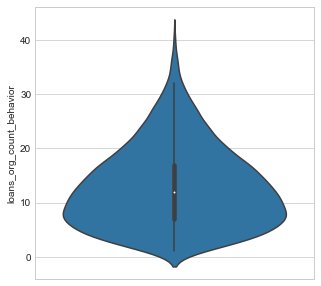

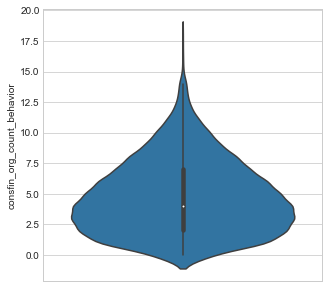

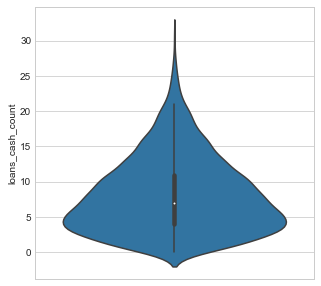

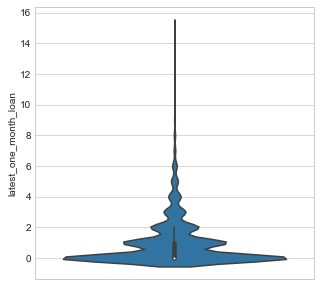

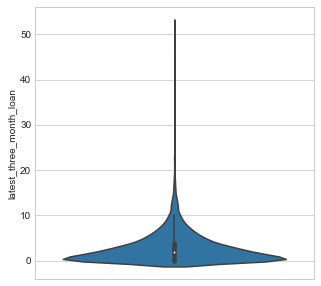

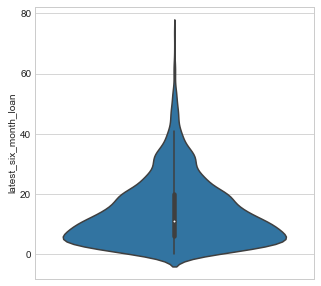

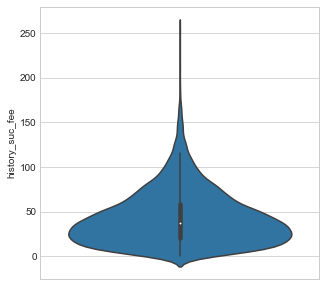

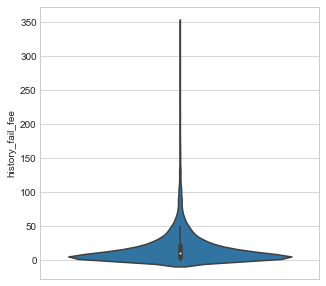

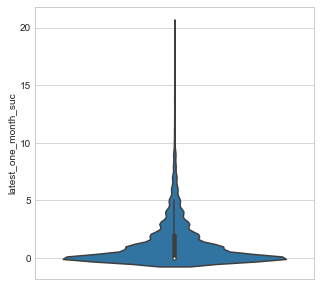

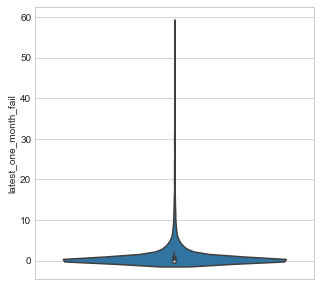

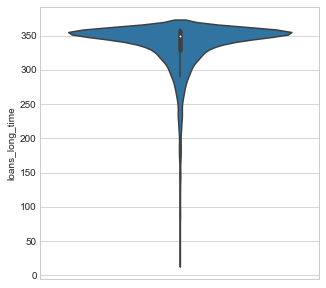

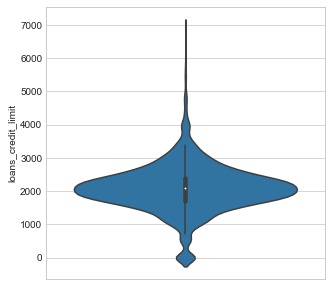

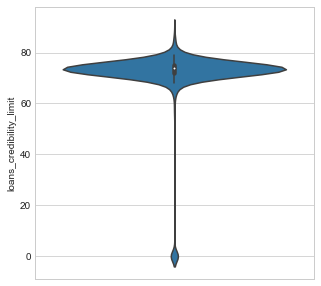

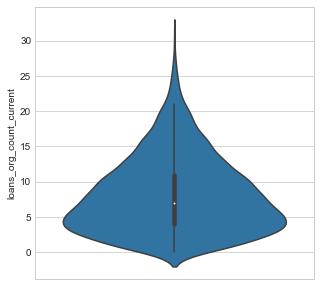

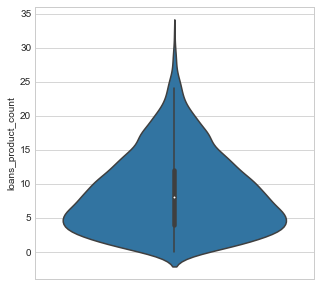

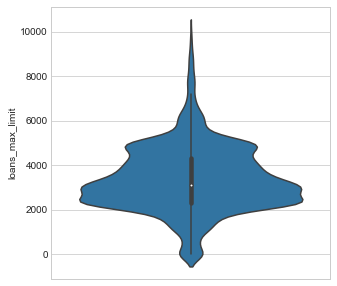

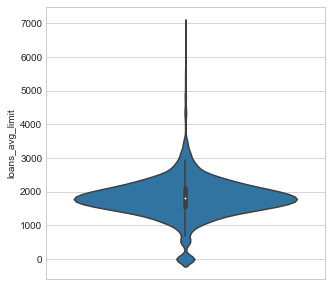

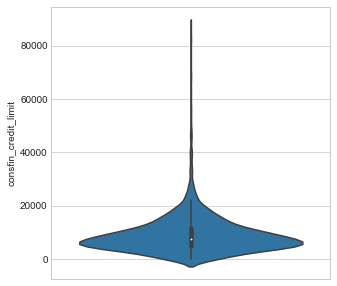

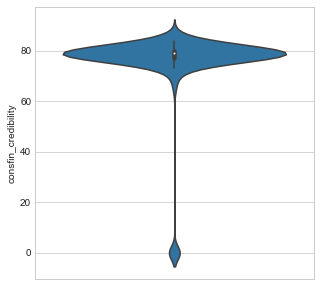

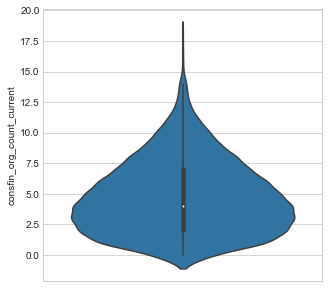

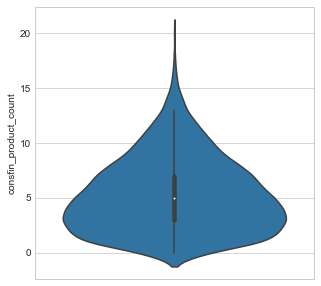

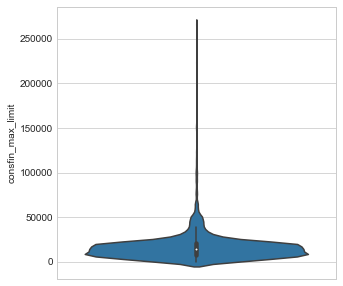

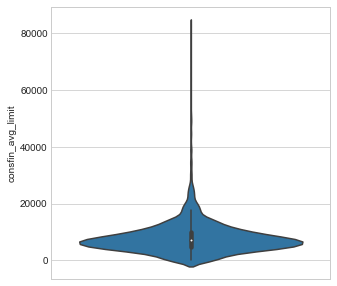

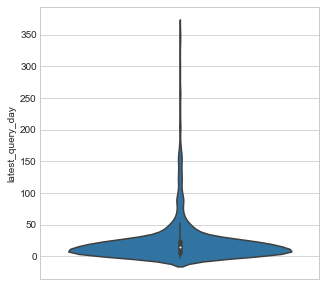

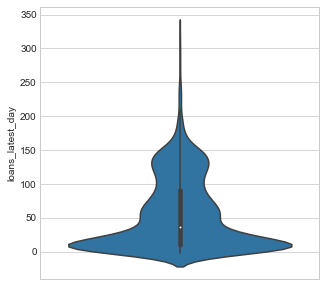

In [24]:
for i, col in enumerate(data_num.columns):
    plt.figure(i + 1, figsize=(5, 5))
    #sns.boxplot(data_num[col])
    sns.violinplot(y=data_num[col])

**日期/时间型特征**

前面在object变量筛选时已经删除，此处或许可能重拿回（注意前面已经删除了部分index），将其拆分成year month day or time几个特征。
pd.to_datetime(data['latest_query_time']).dt.year

**数据标准化**  
受异常值的影响，这部分可能比较不理想

In [25]:
data_scaling = data.apply(lambda x : (x-np.min(x))/(np.max(x)-np.min(x)))
data_scaling.head()

,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,trans_days_interval,regional_mobility,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
0,0.01,0.99,0.000000,0.000019,0.488636,0.308370,0.375,0.094737,0.095652,0.50,...,0.29,0.244638,0.013777,0.862069,0.055556,0.10,0.004505,0.014493,0.038674,0.061538
1,0.02,0.94,0.029412,0.000027,1.000000,0.468062,0.425,0.105263,0.043478,0.75,...,0.35,0.254783,0.173364,0.919540,0.277778,0.30,0.085586,0.113043,0.016575,0.012308
2,0.04,0.96,0.000000,0.000021,1.000000,0.089207,0.275,0.238596,0.078261,0.00,...,0.16,0.181159,0.048220,1.000000,0.055556,0.05,0.015766,0.050725,0.011050,0.024615
3,0.00,0.96,0.029412,0.000003,0.511364,0.819383,0.500,0.049123,0.008696,0.50,...,0.32,0.223333,0.187141,0.919540,0.277778,0.25,0.112613,0.147101,0.011050,0.018462
4,0.01,0.99,0.000000,0.000010,1.000000,0.156388,0.275,0.231579,0.165217,0.00,...,0.23,0.236232,0.095293,0.908046,0.111111,0.10,0.031532,0.099638,0.066298,0.375385


**目标特征数据不均衡处理**

**采用SMOTE采样**  
步骤1:K均值聚类  
步骤2:以概率{P}选择一个聚类C,两个策略：聚类越大，采样率越低 or 聚类越大，采样率越高  
步骤3:聚类C中随机选择两个样本s1 s_2 ,计算新样本s_x :s_x = w * s_1 +(1+w * s_2 w∈（0，1）随机数  
步骤4:重复步骤2和步骤3，直至生成N和新样本  



In [26]:
#切分特征

data_scaling_Y = data['status']
data_scaling_X = data_scaling.drop('status', axis=1)
print(data_scaling_X.shape)
print(data_scaling_Y.shape)

(4457, 77)
(4457,)


In [27]:
#使用smote方法进行抽样处理
from imblearn.over_sampling import SMOTE  # 过抽样处理库SMOTE
from imblearn.under_sampling import RandomUnderSampler  # 欠抽样处理库RandomUnderSampler

model_smote = SMOTE()  #建立SMOTE模型对象
x_smote_resampled, y_smote_resampled = model_smote.fit_sample(
    data_scaling_X, data_scaling_Y)  #输入数据并作过抽样处理
x_smote_resampled = pd.DataFrame(x_smote_resampled,
                                 columns=data_scaling_X.columns)
y_smote_resampled = pd.DataFrame(y_smote_resampled, columns=['status'])
smote_resampled = pd.concat([x_smote_resampled, y_smote_resampled],
                            axis=1)  #按列合并

print('抽样前样本总数：{}'.format(data['status'].shape[0]))
print('抽样前类别比例：{}'.format(data['status'].value_counts()[0] /
                          len(data['status'])))

print('抽样后样本总数：{}'.format(smote_resampled.shape[0]))
print('抽样后好样本个数：{}'.format(smote_resampled.status.value_counts()[0]))
print('抽样后坏样本个数：{}'.format(smote_resampled.status.value_counts()[1]))

抽样前样本总数：4457
抽样前类别比例：0.74848552838232
抽样后样本总数：6672
抽样后好样本个数：3336
抽样后坏样本个数：3336


**特征筛选**  

**使用IV值筛选特征**  
计算一个变量的WOE编码  ·  分组·  计算WOE_i  ·  计算IV_i  ·  计算IV  

In [28]:
#另外一种计算——包含了分组

#计算一个特征的iv
def cal_iv(x, y, n_bins=5):
    #若x 只有一个值，返回0
    if len(x.unique()) == 1 or len(x) != len(y):
        return 0

    if x.dtype == np.number:
        #数值型变量
        if x.nunique() > n_bins:
            #若nunique 大于分组数，进行分箱
            x = pd.qcut(x, q = n_bins, duplicates = 'drop')

    #计算iv
    groups = x.groupby([x, list(y)]).size().unstack().fillna(0)
    t0, t1 = y.value_counts().index
    groups = groups / groups.sum()
    not_zero_index = (groups[t0] > 0) & (groups[t1] > 0)
    groups['iv_i'] = (groups[t0] - groups[t1]) * np.log(groups[t0] / groups[t1])
    iv = sum(groups['iv_i'])

    return iv

In [29]:
#得出每个特征的iv后，筛选除高于0.02的特征

#计算每个特征相应的iv值
fea_iv = data_scaling_X.apply(lambda x: cal_iv(x, data_scaling_Y),
                              axis=0).sort_values(ascending=False)

#筛选IV>0.05的特征 预测能力一般与有较强预测的能力的特征
imp_fea_iv = fea_iv[fea_iv > 0.05].index
imp_fea_iv
#len(imp_fea_iv)
#筛选出16个特征

Index(['history_fail_fee', 'trans_fail_top_count_enum_last_1_month',
       'loans_score', 'loans_overdue_count', 'apply_score',
       'trans_fail_top_count_enum_last_6_month',
       'trans_fail_top_count_enum_last_12_month', 'latest_one_month_fail',
       'rank_trad_1_month', 'latest_one_month_suc', 'trans_day_last_12_month',
       'max_cumulative_consume_later_1_month', 'trans_top_time_last_1_month',
       'top_trans_count_last_1_month',
       'pawns_auctions_trusts_consume_last_1_month', 'consfin_avg_limit'],
      dtype='object')

**使用随机森林特征筛选**  
1.平均不纯度减少  
2.平均精确率减少

In [30]:
from sklearn.ensemble import RandomForestClassifier


def RandomFroest(X, Y):
    feat_lables = X.columns
    forest = RandomForestClassifier(n_estimators=10000,
                                    random_state=0,
                                    n_jobs=1)
    forest.fit(X, Y)
    importance = forest.feature_importances_
    imp_result = np.argsort(importance)[::-1]  #排序

    for i in range(X.shape[1]):
        print("第%2d个：特征名: %-*s 重要程度：%f" %
              (i + 1, 30, feat_lables[i],
               importance[imp_result[i]]))  #正则？+importanc
    threshold = 0.01  #阈值? 有什么理论依据?
    data_index = list(X.columns[importance < threshold])
    print('变量筛选前特征个数：{}'.format(X.shape))  #去除前的变量个数
    X.drop(data_index, axis=1, inplace=True)  #去除小于阈值的特征
    print('变量筛选后特征个数：{}'.format(X.shape))  #剩下的变量
    return X

In [31]:
X_RF = RandomFroest(data_scaling_X,data_scaling_Y)
X_RF.columns

第 1个：特征名: low_volume_percent             重要程度：0.049228
第 2个：特征名: middle_volume_percent          重要程度：0.048513
第 3个：特征名: take_amount_in_later_12_month_highest 重要程度：0.038839
第 4个：特征名: trans_amount_increase_rate_lately 重要程度：0.031988
第 5个：特征名: trans_activity_month           重要程度：0.026213
第 6个：特征名: trans_activity_day             重要程度：0.023729
第 7个：特征名: transd_mcc                     重要程度：0.017631
第 8个：特征名: trans_days_interval_filter     重要程度：0.017192
第 9个：特征名: trans_days_interval            重要程度：0.016319
第10个：特征名: regional_mobility              重要程度：0.016311
第11个：特征名: student_feature                重要程度：0.015635
第12个：特征名: repayment_capability           重要程度：0.015609
第13个：特征名: number_of_trans_from_2011      重要程度：0.015560
第14个：特征名: historical_trans_amount        重要程度：0.015476
第15个：特征名: historical_trans_day           重要程度：0.015404
第16个：特征名: rank_trad_1_month              重要程度：0.015337
第17个：特征名: trans_amount_3_month           重要程度：0.015192
第18个：特征名: avg_consume_less_12_valid_month 重要程度：0.014574

Index(['take_amount_in_later_12_month_highest',
       'trans_amount_increase_rate_lately', 'trans_activity_month',
       'trans_activity_day', 'transd_mcc', 'trans_days_interval_filter',
       'trans_days_interval', 'repayment_capability',
       'number_of_trans_from_2011', 'historical_trans_amount',
       'historical_trans_day', 'rank_trad_1_month', 'trans_amount_3_month',
       'abs', 'avg_price_last_12_month', 'trans_top_time_last_1_month',
       'trans_top_time_last_6_month', 'consume_top_time_last_1_month',
       'consume_top_time_last_6_month',
       'trans_fail_top_count_enum_last_1_month',
       'trans_fail_top_count_enum_last_6_month',
       'trans_fail_top_count_enum_last_12_month',
       'max_cumulative_consume_later_1_month',
       'pawns_auctions_trusts_consume_last_6_month', 'first_transaction_day',
       'trans_day_last_12_month', 'apply_score', 'apply_credibility',
       'query_sum_count', 'latest_three_month_apply', 'latest_six_month_apply',
       'loan

**合并两种筛选方式得到的特征**

In [32]:
#将两种方式筛选出的特征进行合并，取并集
imp_fea = list(set(imp_fea_iv).intersection(set(X_RF.columns)))
data_X_imp = data_scaling_X[imp_fea]
data_X_imp.shape

(4457, 14)

## Task3 建模
逻辑回归、svm和决策树；随机森林和XGBoost进行建模，不考虑调参

**切分测试集 训练集**

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(data_scaling_X,
                                                    data_scaling_Y,
                                                    test_size=0.3,
                                                    random_state=2018)

**定义性能评估函数**

In [34]:
from sklearn.metrics import accuracy_score,roc_auc_score

def model_metrics(clf,X_train,X_test,Y_train,Y_test):
    #预测
    Y_train_pred = clf.predict(X_train)
    Y_test_pred = clf.predict(X_test)
    
    Y_train_proba = clf.predict_proba(X_train)[:,1]#计算准确率，召回率
    Y_test_proba = clf.predict_proba(X_test)[:,1]
    
    #准确率
    print('[准确率]', end = ' ')
    print('训练集','%.4f'%accuracy_score(Y_train,Y_train_pred), end = ' ')
    print('测试集','%.4f'%accuracy_score(Y_test,Y_test_pred))

    #auc取值
    print('[auc值]', end = ' ')
    print('训练集','%.4f'%roc_auc_score(Y_train,Y_train_proba), end = ' ')
    print('测试集','%.4f'%roc_auc_score(Y_test,Y_test_proba))

### **建立模型**  

In [35]:
from sklearn.model_selection import GridSearchCV #调参数
from sklearn.linear_model import LogisticRegression #逻辑回归
from sklearn import svm   #svm
from sklearn.tree import DecisionTreeClassifier #决策树
from sklearn.ensemble import RandomForestClassifier #随机森林
from xgboost.sklearn import XGBClassifier  #xgboost
#from mlxtend.classifier import StackingClassifier #模型融合

**逻辑回归模型**

In [36]:
LR = LogisticRegression()  #默认参数，详细参数由后续调参完成
LR.fit(X_train, Y_train)
model_metrics(LR, X_train, X_test, Y_train, Y_test)

[准确率] 训练集 0.7977 测试集 0.7937
[auc值] 训练集 0.7959 测试集 0.7974


**SVM模型**  
 线性SVM  
 多项式核函数  
 高斯核函数  
 sigmoid核函数

In [37]:
#线性SVM
svm_linear = svm.SVC(kernel='linear',probability=True)
svm_linear.fit(X_train, Y_train)
model_metrics(svm_linear, X_train, X_test, Y_train, Y_test)

[准确率] 训练集 0.7871 测试集 0.7855
[auc值] 训练集 0.8070 测试集 0.8086


In [38]:
#多项式核函数
svm_poly = svm.SVC(kernel='poly',probability=True)
svm_poly.fit(X_train, Y_train)
model_metrics(svm_poly, X_train, X_test, Y_train, Y_test)

[准确率] 训练集 0.7470 测试集 0.7519
[auc值] 训练集 0.7957 测试集 0.7967


In [39]:
#径像核函数/高斯核 默认
svm_rbf = svm.SVC(kernel='rbf',probability=True)
svm_rbf.fit(X_train, Y_train)
model_metrics(svm_rbf, X_train, X_test, Y_train, Y_test)

[准确率] 训练集 0.7512 测试集 0.7556
[auc值] 训练集 0.7994 测试集 0.8004


In [40]:
#sigmoid核函数
svm_sigmoid = svm.SVC(kernel='sigmoid',probability=True)
svm_sigmoid.fit(X_train, Y_train)
model_metrics(svm_sigmoid, X_train, X_test, Y_train, Y_test)

[准确率] 训练集 0.7470 测试集 0.7519
[auc值] 训练集 0.7980 测试集 0.7987


**决策树模型**

In [41]:
DT = DecisionTreeClassifier(random_state = 2018)
DT.fit(X_train, Y_train)
model_metrics(DT, X_train, X_test, Y_train, Y_test)

[准确率] 训练集 1.0000 测试集 0.6891
[auc值] 训练集 1.0000 测试集 0.6116


**XGBoost模型**

In [42]:
xgb = XGBClassifier(random_state =2018)
xgb.fit(X_train, Y_train)
model_metrics(xgb, X_train, X_test, Y_train, Y_test)

[准确率] 训练集 0.8477 测试集 0.7945
[auc值] 训练集 0.9044 测试集 0.8046


**总结**

In [43]:
print('逻辑回归模型:')
model_metrics(LR, X_train, X_test, Y_train, Y_test)
print('=' * 40)
print('SVM模型-线性:')
model_metrics(svm_linear, X_train, X_test, Y_train, Y_test)
print('=' * 40)
print('SVM模型-多项式核函数:')
model_metrics(svm_poly, X_train, X_test, Y_train, Y_test)
print('=' * 40)
print('SVM模型-高斯核函数:')
model_metrics(svm_rbf, X_train, X_test, Y_train, Y_test)
print('=' * 40)
print('SVM模型-sigmoid核函数:')
model_metrics(svm_sigmoid, X_train, X_test, Y_train, Y_test)
print('=' * 40)
print('决策树:')
model_metrics(DT, X_train, X_test, Y_train, Y_test)
print('=' * 40)
print('XGBoost')
model_metrics(xgb, X_train, X_test, Y_train, Y_test)

逻辑回归模型:
[准确率] 训练集 0.7977 测试集 0.7937
[auc值] 训练集 0.7959 测试集 0.7974
SVM模型-线性:
[准确率] 训练集 0.7871 测试集 0.7855
[auc值] 训练集 0.8070 测试集 0.8086
SVM模型-多项式核函数:
[准确率] 训练集 0.7470 测试集 0.7519
[auc值] 训练集 0.7957 测试集 0.7967
SVM模型-高斯核函数:
[准确率] 训练集 0.7512 测试集 0.7556
[auc值] 训练集 0.7994 测试集 0.8004
SVM模型-sigmoid核函数:
[准确率] 训练集 0.7470 测试集 0.7519
[auc值] 训练集 0.7980 测试集 0.7987
决策树:
[准确率] 训练集 1.0000 测试集 0.6891
[auc值] 训练集 1.0000 测试集 0.6116
XGBoost
[准确率] 训练集 0.8477 测试集 0.7945
[auc值] 训练集 0.9044 测试集 0.8046


在都是默认参数的情况下相较而言：  
**决策树**对测试集的准确率较高，准确率为1，但对测试集的测准确率最低，过拟合?? 
**SVM模型**中，相对而言较好的是**线性SVM模型**。  
总体相比表现较好的是**XGBoost模型**  
下一步可根据调试各个模型中的参数来调整模型。  
针对**决策树**准确率为1的模型表示疑问，试着看调参后的结果。  
同时，可尝试**SVM模型**的其他核函数中调参后是否会比线性的表现更优?  

## Task4 模型评估  
记录5个模型（逻辑回归、SVM、决策树、随机森林、XGBoost） 关于accuracy、precision、recall和F1-score、auc值的评分表格，并画出ROC曲线

**重新定义模型评估函数**

In [44]:
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn import metrics

def model_metrics(clf,X_train,X_test,Y_train,Y_test):
    #预测
    Y_train_pred = clf.predict(X_train)
    Y_test_pred = clf.predict(X_test)
    
    Y_train_proba = clf.predict_proba(X_train)[:,1]#计算准确率，召回率
    Y_test_proba = clf.predict_proba(X_test)[:,1]
    #准确率
    print('【准确率】', end = ' ')
    print('训练集','%.4f'%accuracy_score(Y_train,Y_train_pred), end = ' ')
    print('测试集','%.4f'%accuracy_score(Y_test,Y_test_pred),)
    
    #精准率
    print('【精准率】', end = ' ')
    print('训练集','%.4f'%metrics.precision_score(Y_train,Y_train_pred), end = ' ')
    print('测试集','%.4f'%metrics.precision_score(Y_test,Y_test_pred))
    
    #召回率 Recall
    print('【召回率】', end = ' ')
    print('训练集','%.4f'%metrics.recall_score(Y_train,Y_train_pred), end = ' ')
    print('测试集','%.4f'%metrics.recall_score(Y_test,Y_test_pred))
    
    #F1-score
    print('【F1-Score】', end = ' ')
    print('训练集','%.4f'%metrics.f1_score(Y_train,Y_train_pred), end = ' ')
    print('测试集','%.4f'%metrics.f1_score(Y_test,Y_test_pred))

    #auc取值
    print('【auc值】', end = ' ')
    print('训练集','%.4f'%roc_auc_score(Y_train,Y_train_proba), end = ' ')
    print('测试集','%.4f'%roc_auc_score(Y_test,Y_test_proba))
    print('【ROC曲线】')

In [45]:
#定义画ROC曲线的函数——单个分类器
def drawROC(clf,X_test,Y_test,title):
    y_score = clf.predict_proba(X_test)[:,1]
    fpr,tpr,thresholds = metrics.roc_curve(Y_test, y_score, 
                                           pos_label=None,
                                           sample_weight=None,
                                           drop_intermediate=True)
    auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, label='AUC:{a:0.2f})'.format(a=auc))
    plt.legend(loc="lower right")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.show()

**总结前面的模型**

逻辑回归模型:
【准确率】 训练集 0.7977 测试集 0.7937
【精准率】 训练集 0.7582 测试集 0.7090
【召回率】 训练集 0.2940 测试集 0.2861
【F1-Score】 训练集 0.4237 测试集 0.4077
【auc值】 训练集 0.7959 测试集 0.7974
【ROC曲线】


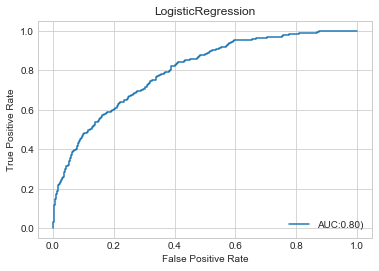

SVM模型-线性:
【准确率】 训练集 0.7871 测试集 0.7855
【精准率】 训练集 0.8205 测试集 0.7528
【召回率】 训练集 0.2028 测试集 0.2018
【F1-Score】 训练集 0.3252 测试集 0.3183
【auc值】 训练集 0.8070 测试集 0.8086
【ROC曲线】


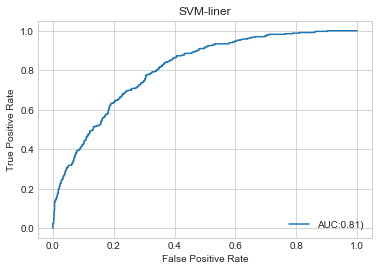

SVM模型-多项式核函数:
【准确率】 训练集 0.7470 测试集 0.7519
【精准率】 训练集 0.0000 测试集 0.0000
【召回率】 训练集 0.0000 测试集 0.0000
【F1-Score】 训练集 0.0000 测试集 0.0000
【auc值】 训练集 0.7957 测试集 0.7967
【ROC曲线】


F:\anacoda\anacoda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
F:\anacoda\anacoda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
F:\anacoda\anacoda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
F:\anacoda\anacoda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


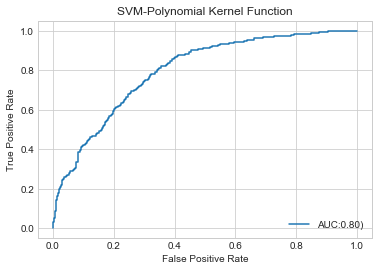

SVM模型-高斯核函数:
【准确率】 训练集 0.7512 测试集 0.7556
【精准率】 训练集 1.0000 测试集 1.0000
【召回率】 训练集 0.0165 测试集 0.0151
【F1-Score】 训练集 0.0324 测试集 0.0297
【auc值】 训练集 0.7994 测试集 0.8004
【ROC曲线】


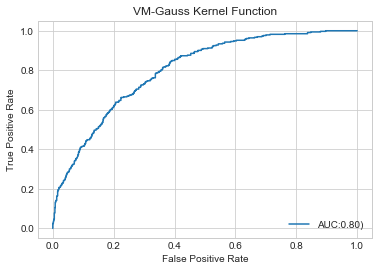

SVM模型-sigmoid核函数:
【准确率】 训练集 0.7470 测试集 0.7519
【精准率】 训练集 0.0000 测试集 0.0000
【召回率】 训练集 0.0000 测试集 0.0000
【F1-Score】 训练集 0.0000 测试集 0.0000
【auc值】 训练集 0.7980 测试集 0.7987
【ROC曲线】


F:\anacoda\anacoda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
F:\anacoda\anacoda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
F:\anacoda\anacoda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
F:\anacoda\anacoda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


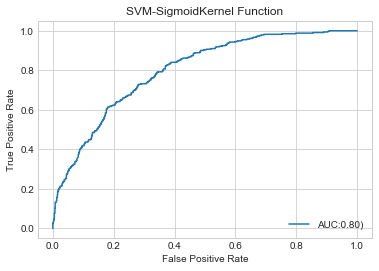

决策树:
【准确率】 训练集 1.0000 测试集 0.6891
【精准率】 训练集 1.0000 测试集 0.3918
【召回率】 训练集 1.0000 测试集 0.4578
【F1-Score】 训练集 1.0000 测试集 0.4222
【auc值】 训练集 1.0000 测试集 0.6116
【ROC曲线】


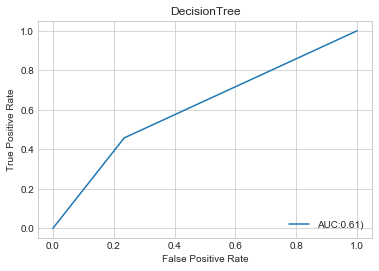

XGBoost
【准确率】 训练集 0.8477 测试集 0.7945
【精准率】 训练集 0.8473 测试集 0.6477
【召回率】 训练集 0.4854 测试集 0.3765
【F1-Score】 训练集 0.6172 测试集 0.4762
【auc值】 训练集 0.9044 测试集 0.8046
【ROC曲线】


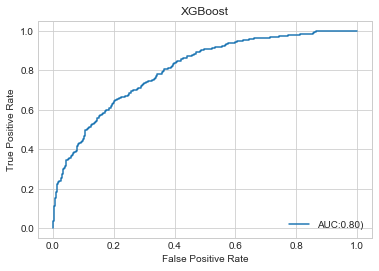

In [46]:
print('逻辑回归模型:')
model_metrics(LR, X_train, X_test, Y_train, Y_test)
drawROC(LR,X_test,Y_test,'LogisticRegression')
print('=' * 40)

print('SVM模型-线性:')
model_metrics(svm_linear, X_train, X_test, Y_train, Y_test)
drawROC(svm_linear,X_test,Y_test,'SVM-liner')
print('=' * 40)

print('SVM模型-多项式核函数:')
model_metrics(svm_poly, X_train, X_test, Y_train, Y_test)
drawROC(svm_poly,X_test,Y_test,'SVM-Polynomial Kernel Function')
print('=' * 40)

print('SVM模型-高斯核函数:')
model_metrics(svm_rbf, X_train, X_test, Y_train, Y_test)
drawROC(svm_rbf,X_test,Y_test,'VM-Gauss Kernel Function')
print('=' * 40)

print('SVM模型-sigmoid核函数:')
model_metrics(svm_sigmoid, X_train, X_test, Y_train, Y_test)
drawROC(svm_sigmoid,X_test,Y_test,'SVM-SigmoidKernel Function')
print('=' * 40)

print('决策树:')
model_metrics(DT, X_train, X_test, Y_train, Y_test)
drawROC(DT,X_test, Y_test,'DecisionTree')
print('=' * 40)

print('XGBoost')
model_metrics(xgb, X_train, X_test, Y_train, Y_test)
drawROC(xgb,X_test, Y_test,'XGBoost')

 ## Task 5 模型调优
任务5：使用网格搜索法对5个模型进行调优（调参时采用五折交叉验证的方式），并进行模型评估，记得展示代码的运行结果。 

In [47]:
from sklearn.model_selection import GridSearchCV

**逻辑回归模型**

In [48]:
LR = LogisticRegression()  
param = {'C':[0.01,0.1,1,10,100],'penalty':['l1', 'l2']}
#C 正则化强度的倒数，较小的值表示更强的正则化
#penalty 惩罚项 官方文档可选11 12

gscv = GridSearchCV(LR, param_grid = param,scoring='roc_auc',cv=5)
#cv=5 五折交叉
#scorin = 'roc_auc' 用auc值评估

gscv.fit(X_train,Y_train)

print('最佳参数：',gscv.best_params_)
print('训练集的最佳分数:',gscv.best_score_)
print('测试集的最佳分数：',gscv.score(X_test,Y_test))

最佳参数： {'C': 10, 'penalty': 'l1'}
训练集的最佳分数: 0.7893867693743006
测试集的最佳分数： 0.8029204292318378


**SVM模型**

In [49]:
#线性SVM
svm_linear = svm.SVC(kernel = 'linear', probability=True)

param = {'C':[0.01,0.1,1]} #惩罚参数 错误项 默认1

gscv = GridSearchCV(svm_linear,param_grid = param,scoring='roc_auc',cv =5)
gscv.fit(X_train,Y_train)

print('最佳参数：',gscv.best_params_)
print('训练集的最佳分数:',gscv.best_score_)
print('测试集的最佳分数：',gscv.score(X_test,Y_test))

最佳参数： {'C': 1}
训练集的最佳分数: 0.7971450422551442
测试集的最佳分数： 0.8086361349972455


In [50]:
#多项式核函数
svm_poly = svm.SVC(kernel = 'poly', probability=True)

param = {'C':[0.01,0.1,1]} #惩罚参数 错误项 默认1

gscv = GridSearchCV(svm_poly,param_grid = param,scoring='roc_auc',cv =5)
gscv.fit(X_train,Y_train)

print('最佳参数：',gscv.best_params_)
print('训练集的最佳分数:',gscv.best_score_)
print('测试集的最佳分数：',gscv.score(X_test,Y_test))

最佳参数： {'C': 1}
训练集的最佳分数: 0.7803289215708327
测试集的最佳分数： 0.7966777647368799


In [51]:
#高斯核函数
svm_rbf = svm.SVC(kernel = 'rbf', probability=True)
param = {'C':[0.01,0.1,1]} #惩罚参数 错误项 默认1

gscv = GridSearchCV(svm_rbf,param_grid = param,scoring='roc_auc',cv =5)
gscv.fit(X_train,Y_train)

print('最佳参数：',gscv.best_params_)
print('训练集的最佳分数:',gscv.best_score_)
print('测试集的最佳分数：',gscv.score(X_test,Y_test))

最佳参数： {'C': 1}
训练集的最佳分数: 0.7909685604942758
测试集的最佳分数： 0.8003724640111141


In [52]:
# sigmoid 函数
svm_sigmoid = svm.SVC(kernel = 'sigmoid', probability=True)
param = {'C':[0.01,0.1,1]} #惩罚参数 错误项 默认1

gscv = GridSearchCV(svm_sigmoid,param_grid = param,scoring='roc_auc',cv =5)
gscv.fit(X_train,Y_train)

print('最佳参数：',gscv.best_params_)
print('训练集的最佳分数:',gscv.best_score_)
print('测试集的最佳分数：',gscv.score(X_test,Y_test))

最佳参数： {'C': 0.1}
训练集的最佳分数: 0.7904667908330548
测试集的最佳分数： 0.7971867589642865


**决策树模型**  
主要调整哪些参数？  
max_depth: 树的最大深度  
min_samples_split:拆分内部节点所需的样本数  
min_samples_leaf:叶子节点最少的样本数  
max_features:最大特征数

1.先对max_depth和min_samples_split进行网格搜索

In [53]:
DT = DecisionTreeClassifier()
param = {'max_depth':range(10,50,2),'min_samples_split':range(10,101,10)}
gscv = GridSearchCV(DT,param_grid = param,scoring ='roc_auc', cv=5)

gscv.fit(X_train, Y_train)

print('最佳参数：',gscv.best_params_)
print('当前最佳分数：',gscv.best_score_)

最佳参数： {'max_depth': 10, 'min_samples_split': 100}
当前最佳分数： 0.7070169862505828


2.对min_samples_split和min_samples_leaf进行网格搜索

In [54]:
DT = DecisionTreeClassifier(max_depth=10)
param = {'min_samples_split':range(100,1000,50),'min_samples_leaf':range(10,100,10)}

gscv = GridSearchCV(DT,param_grid = param,scoring ='roc_auc', cv=5)

gscv.fit(X_train, Y_train)

print('最佳参数：',gscv.best_params_)
print('当前最佳分数：',gscv.best_score_)

最佳参数： {'min_samples_leaf': 90, 'min_samples_split': 400}
当前最佳分数： 0.727398705768406


3.再对max_feature进行网格搜索

In [55]:
DT = DecisionTreeClassifier(max_depth=10,min_samples_leaf=90,min_samples_split=400)
param = {'max_features':range(2,20)}
gscv = GridSearchCV(DT,param_grid = param,scoring ='roc_auc', cv=5)

gscv.fit(X_train, Y_train)

print('最佳参数：',gscv.best_params_)
print('当前最佳分数：',gscv.best_score_)

最佳参数： {'max_features': 10}
当前最佳分数： 0.7224957426784118


**XGBoost模型**    
通用参数：宏观函数控制。  
Booster参数：控制每一步的booster(tree/regression)。booster参数一般可以调控模型的效果和计算代价。我们所说的调参，很这是大程度上都是在调整booster参数。  
学习目标参数：控制训练目标的表现。我们对于问题的划分主要体现在学习目标参数上。比如我们要做分类还是回归，做二分类还是多分类，这都是目标参数所提供的。  
【n_estimatores】  
    含义：总共迭代的次数，即决策树的个数  
    调参：  
early_stopping_rounds  
    含义：在验证集上，当连续n次迭代，分数没有提高后，提前终止训练。  
    调参：防止overfitting。  
【max_depth】  
    含义：树的深度，默认值为6，典型值3-10。  
    调参：值越大，越容易过拟合；值越小，越容易欠拟合。  
【min_child_weight】  
    含义：默认值为1,。  
    调参：值越大，越容易欠拟合；值越小，越容易过拟合（值较大时，避免模型学习到局部的特殊样本）。  
【subsample】 
    含义：训练每棵树时，使用的数据占全部训练集的比例。默认值为1，典型值为0.5-1。  
    调参：防止overfitting。  
【colsample_bytree】  
    含义：训练每棵树时，使用的特征占全部特征的比例。默认值为1，典型值为0.5-1。  
    调参：防止overfitting。  
【learning_rate】  
    含义：学习率，控制每次迭代更新权重时的步长，默认0.3。  
    调参：值越小，训练越慢。  
    典型值为0.01-0.2。  
objective 目标函数  
    回归任务  
        reg:linear (默认)  
        reg:logistic   
    二分类  
        binary:logistic     概率   
        binary：logitraw   类别  
    多分类  
        multi：softmax  num_class=n   返回类别    
        multi：softprob   num_class=n  返回概率    
    rank:pairwise   
eval_metric  
    回归任务(默认rmse)  
        rmse--均方根误差  
        mae--平均绝对误差  
    分类任务(默认error)  
        auc--roc曲线下面积  
        error--错误率（二分类）  
        merror--错误率（多分类）  
        logloss--负对数似然函数（二分类）   
        mlogloss--负对数似然函数（多分类）  
【gamma】  
    惩罚项系数，指定节点分裂所需的最小损失函数下降值。  
    调参：  
alpha  
    L1正则化系数，默认为1  
lambda  
    L2正则化系数，默认为1  

1.先对迭代次数（n_estimatores）和树的深度（max_depth）进行网格搜索

2.对min_child_weight和subsample网格搜索

3.对learning_rate和gamma网格搜索

分数下降，因此在这2个参数中选用默认值gamma=0，learning_rate=0.3

4.尝试对reg_alpha网格搜索

分数下降，因此在这个参数中选用默认值

第三次尝试  
step1:先初始设定参数  

step2：max_depth 和 min_child_weight 参数调优

step3：gamma参数调优

step4：调整subsample 和 colsample_bytree 参数

step5：正则化参数调优

step6：降低学习速率

反倒降低了，因此还是选择学习速率为0.1，n_estimator=1000

>第一次尝试结果：max_depth=3, n_estimatores=10,min_child_weight=18,subsample=0.8,gamma= 0.1, learning_rate=0.04  
当前最佳分数： 0.7912713039452244

>第二次尝试结果：max_depth=3, n_estimatores=10,min_child_weight=16,subsample=1.0,gamma=0,learning_rate=0.3  
当前最佳分数： 0.7734080152974204

>第三次尝试结果：learning_rate = 0.01,n_estimator = 5000,max_depth = 2,min_child_weight =2, gamma = 0.3,subsample = 0.9,colsample_bytree = 0.8,objetive = 'binary:logistic', nthread = 4,scale_pos_weight = 1,reg_alpha=1
当前最佳分数： 0.7920684598319873

模型|参数|结果（auc值）         
-|----|-
LogistRegression|C=10,penalty=11 |训练集 0.8070 测试集 0.8029
SVM_linear|C=1,kernel = 'linear', probability=True |训练集 0.8070 测试集 0.8086
SVM_poly|C=1,kernel = 'poly', probability=True |训练集 0.7956 测试集 0.7967
SVM_rbf|C=1,kernel = 'rbf', probability=True|训练集 0.7994 测试集 0.8004
SVM_sigmoid|C=0.1,kernel = 'sigmoid', probability=True|训练集 0.7977 测试集 0.7972
DecisonTree|max_depth=16,min_samples_leaf=90,min_samples_split=400|训练集 0.7817 测试集 0.7554
XGBoost|learning_rate = 0.01,n_estimator = 5000,max_depth = 2,min_child_weight =2,<br> gamma = 0.3,subsample = 0.9,colsample_bytree = 0.8,<br>objetive = 'binary:logistic', nthread = 4,scale_pos_weight = 1,reg_alpha=1 | 训练集 0.7865 测试集 0.7863

疑问：  
1.在模型调参中，有参数调整的顺序？一般都是怎么样的？  
2.调整的过程中反倒分数降低了，是否没用？（是否以分数作为唯一评判参数是否合适的标准？）  
3.如果模型前使用了SMOTE的方式处理目标变量不平均的问题，在后续的模型评价中需要以什么样的形式调整？

## Task6 模型融合
Stacking融合，用你目前评分最高的模型作为基准模型，和其他模型进行stacking融合，得到最终模型及评分结果。

In [56]:
#以上所有调参后的模型
LR = LogisticRegression(C=10.0,penalty='l1') 
svm_linear = svm.SVC(C=1,kernel = 'linear', probability=True)
svm_poly = svm.SVC(C=1,kernel = 'poly', probability=True)
svm_rbf = svm.SVC(C=1,kernel = 'rbf', probability=True)
svm_sigmoid = svm.SVC(C=0.1,kernel = 'sigmoid', probability=True)
DT = DecisionTreeClassifier(max_depth=10,min_samples_leaf=90,min_samples_split=400)
xgb = XGBClassifier(learning_rate = 0.01,
                     n_estimator = 5000,
                     max_depth = 2,
                     min_child_weight =2,
                     gamma = 0.3,
                     subsample = 0.9,
                     colsample_bytree = 0.8,
                     objetive = 'binary:logistic',
                     nthread = 4,
                     scale_pos_weight = 1,
                    reg_alpha=1
                    )


stacking融合，LR做基准模型（meta_classfier）

【准确率】 训练集 0.7964 测试集 0.7810
【精准率】 训练集 0.6906 测试集 0.5990
【召回率】 训练集 0.3536 测试集 0.3554
【F1-Score】 训练集 0.4677 测试集 0.4461
【auc值】 训练集 0.8127 测试集 0.8078
【ROC曲线】


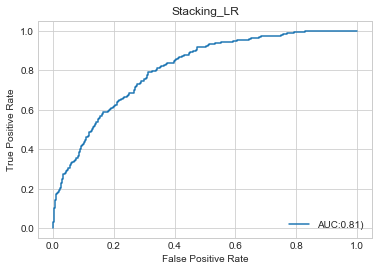

In [59]:
from mlxtend.classifier import StackingClassifier


sclf=StackingClassifier(classifiers=[LR, svm_linear, svm_poly, svm_rbf, svm_sigmoid, DT, xgb],meta_classifier=LR,use_probas=True,average_probas=True)
sclf.fit(X_train, Y_train)
model_metrics(sclf, X_train, X_test, Y_train, Y_test)
drawROC(sclf,X_test, Y_test,'Stacking_LR')

尝试其他模型作为基准模型

【准确率】 训练集 0.7958 测试集 0.7870
【精准率】 训练集 0.7346 测试集 0.6478
【召回率】 训练集 0.3016 测试集 0.3102
【F1-Score】 训练集 0.4277 测试集 0.4196
【auc值】 训练集 0.8127 测试集 0.8078
【ROC曲线】


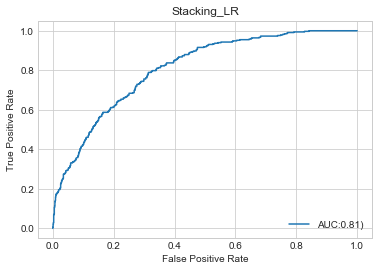

In [61]:
#基准模型：svm_linear


sclf2=StackingClassifier(classifiers=[LR, svm_linear, svm_poly, svm_rbf, svm_sigmoid, DT, xgb],meta_classifier=svm_linear,use_probas=True,average_probas=True)
sclf2.fit(X_train, Y_train)
model_metrics(sclf2, X_train, X_test, Y_train, Y_test)
drawROC(sclf2,X_test, Y_test,'Stacking_svm_linear')

【准确率】 训练集 0.7861 测试集 0.7870
【精准率】 训练集 0.7773 测试集 0.7374
【召回率】 训练集 0.2167 测试集 0.2199
【F1-Score】 训练集 0.3389 测试集 0.3387
【auc值】 训练集 0.7867 测试集 0.7826
【ROC曲线】


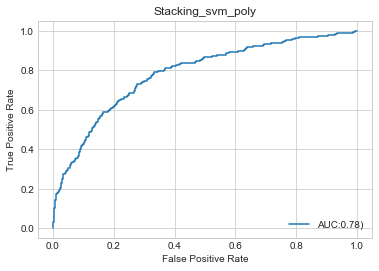

In [62]:
#基准模型：svm_poly


sclf3=StackingClassifier(classifiers=[LR, svm_linear, svm_poly, svm_rbf, svm_sigmoid, DT, xgb],meta_classifier=svm_poly,use_probas=True,average_probas=True)
sclf3.fit(X_train, Y_train)
model_metrics(sclf3, X_train, X_test, Y_train, Y_test)
drawROC(sclf3,X_test, Y_test,'Stacking_svm_poly')

【准确率】 训练集 0.7919 测试集 0.7900
【精准率】 训练集 0.7555 测试集 0.6917
【召回率】 训练集 0.2624 测试集 0.2771
【F1-Score】 训练集 0.3895 测试集 0.3957
【auc值】 训练集 0.7762 测试集 0.7675
【ROC曲线】


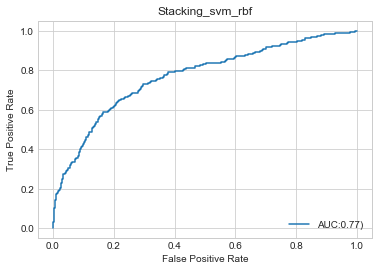

In [63]:
#基准模型：svm_rbf

sclf4=StackingClassifier(classifiers=[LR, svm_linear, svm_poly, svm_rbf, svm_sigmoid, DT, xgb],meta_classifier=svm_rbf,use_probas=True,average_probas=True)
sclf4.fit(X_train, Y_train)
model_metrics(sclf4, X_train, X_test, Y_train, Y_test)
drawROC(sclf4,X_test, Y_test,'Stacking_svm_rbf')

【准确率】 训练集 0.7935 测试集 0.7900
【精准率】 训练集 0.7474 测试集 0.6783
【召回率】 训练集 0.2776 测试集 0.2922
【F1-Score】 训练集 0.4048 测试集 0.4084
【auc值】 训练集 0.8127 测试集 0.8078
【ROC曲线】


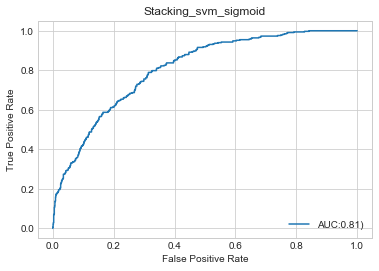

In [64]:
#基准模型：svm_sigmoid

sclf5=StackingClassifier(classifiers=[LR, svm_linear, svm_poly, svm_rbf, svm_sigmoid, DT, xgb],meta_classifier=svm_sigmoid,use_probas=True,average_probas=True)
sclf5.fit(X_train, Y_train)
model_metrics(sclf5, X_train, X_test, Y_train, Y_test)
drawROC(sclf5,X_test, Y_test,'Stacking_svm_sigmoid')

【准确率】 训练集 0.8051 测试集 0.7810
【精准率】 训练集 0.6443 测试集 0.5699
【召回率】 训练集 0.5120 测试集 0.4789
【F1-Score】 训练集 0.5706 测试集 0.5205
【auc值】 训练集 0.8191 测试集 0.8046
【ROC曲线】


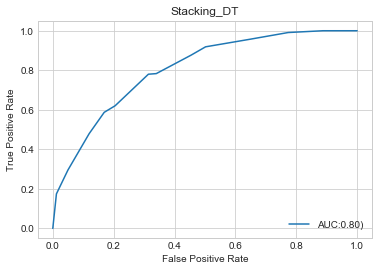

In [65]:
#基准模型：DT

sclf6=StackingClassifier(classifiers=[LR, svm_linear, svm_poly, svm_rbf, svm_sigmoid, DT, xgb],meta_classifier=DT,use_probas=True,average_probas=True)
sclf6.fit(X_train, Y_train)
model_metrics(sclf6, X_train, X_test, Y_train, Y_test)
drawROC(sclf6,X_test, Y_test,'Stacking_DT')

【准确率】 训练集 0.8051 测试集 0.7810
【精准率】 训练集 0.6443 测试集 0.5699
【召回率】 训练集 0.5120 测试集 0.4789
【F1-Score】 训练集 0.5706 测试集 0.5205
【auc值】 训练集 0.8149 测试集 0.8052
【ROC曲线】


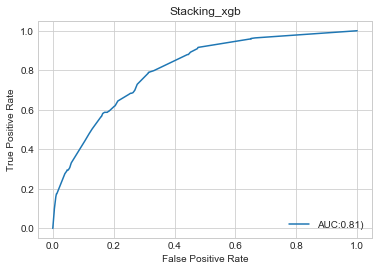

In [66]:
#基准模型：xgb

sclf7=StackingClassifier(classifiers=[LR, svm_linear, svm_poly, svm_rbf, svm_sigmoid, DT, xgb],meta_classifier=xgb,use_probas=True,average_probas=True)
sclf7.fit(X_train, Y_train)
model_metrics(sclf7, X_train, X_test, Y_train, Y_test)
drawROC(sclf7,X_test, Y_test,'Stacking_xgb')

基准模型|结果（auc值）         
-|-
LogistRegression|训练集 0.8127 测试集 0.8078
SVM_linear|训练集 0.8127 测试集 0.8078
SVM_poly|训练集 0.7867 测试集 0.7826
SVM_rbf|训练集 0.7762 测试集 0.7675
SVM_sigmoid|训练集 0.8127 测试集 0.8078
**DecisonTree**|**训练集 0.8191 测试集 0.8046**
XGBoost|训练集 0.8149 测试集 0.8052

疑问：  
使用调参后分数最高的模型作为基准模型，为什么反倒最好的效果是其他不是分数最高的模型略胜一筹?